In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l, w in zip(length, weight)]
fish_data = []

for l, w in zip(length, weight):
    fish_data.append([l, w])

위의 코드를 numpy를 사용해 아래처럼 단순화

In [2]:
import numpy as np

fish_data = np.column_stack( (fish_length, fish_weight) )

In [11]:
#fish_target = [1] * 35 + [0] * 14
#o = np.ones(35)
#z = np.zeros(14)
fish_target = np.concatenate((np.ones(35), np.zeros(14))) 
#위의 코드가 첫줄보다 빠

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=15)
kn.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=15)

In [14]:
r = kn.predict([[25,150]])

if r[0] == 1:
    print("도미")
else:
    print("빙어")

빙어


In [ ]:
distances, indexes = kn.kneighbors([[25,150]])

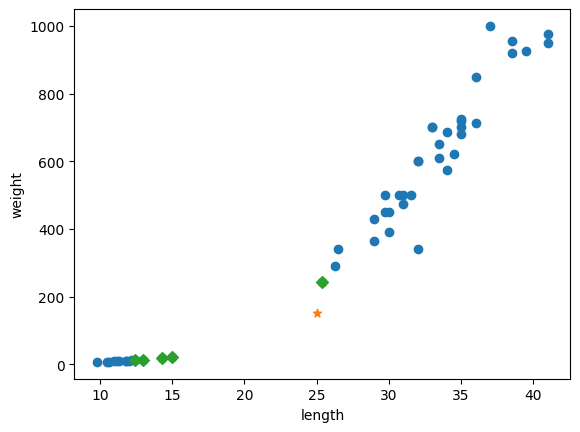

In [20]:
import matplotlib.pyplot as plt
plt.scatter(fish_data[:,0], fish_data[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(25, 150, marker="*")
plt.scatter(fish_data[indexes[0],0], fish_data[indexes[0],1], marker='D')
plt.show()

표준점수(standard score)
표준점수 = (데이터 - 평균)/표준편차

In [24]:
mean = np.mean(fish_data, axis=0)
std = np.std(fish_data, axis=0)
ss = (fish_data - mean) / std
ss

array([[-0.16326134, -0.62350364],
       [-0.07448421, -0.47571019],
       [-0.05475596, -0.32175867],
       [ 0.19184717, -0.25094097],
       [ 0.19184717, -0.04464594],
       [ 0.26089605,  0.01693467],
       [ 0.26089605,  0.17088618],
       [ 0.29048842, -0.16780715],
       [ 0.29048842,  0.01693467],
       [ 0.3595373 ,  0.17088618],
       [ 0.38912967,  0.09391043],
       [ 0.38912967,  0.17088618],
       [ 0.4384503 ,  0.17088618],
       [ 0.48777093, -0.32175867],
       [ 0.48777093,  0.47878922],
       [ 0.48777093,  0.47878922],
       [ 0.58641218,  0.78669225],
       [ 0.58641218,  0.78669225],
       [ 0.6357328 ,  0.50957952],
       [ 0.6357328 ,  0.63274074],
       [ 0.68505343,  0.40181346],
       [ 0.68505343,  0.7405068 ],
       [ 0.73437406,  0.54036983],
       [ 0.78369468,  0.72511165],
       [ 0.78369468,  0.78669225],
       [ 0.78369468,  0.86366801],
       [ 0.78369468,  0.84827286],
       [ 0.88233593,  0.82979868],
       [ 0.88233593,

In [25]:
kn.fit(ss, fish_target)

KNeighborsClassifier()

In [26]:
domi = [25, 150]
domi_scaled = (domi - mean) / std
kn.predict([domi_scaled])

array([1.])

In [36]:
distances, indexes = kn.kneighbors([domi_scaled])

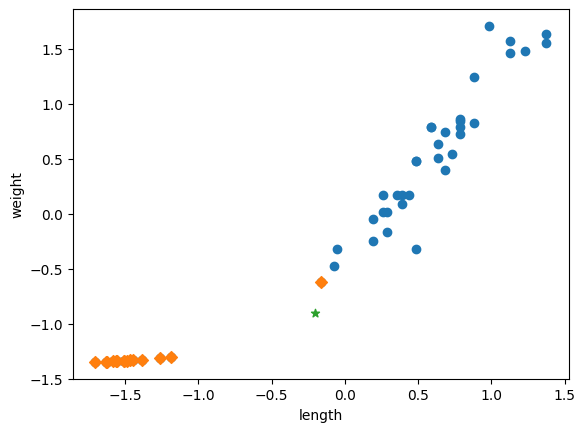

In [37]:
plt.scatter(ss[:,0], ss[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(ss[indexes,0], ss[indexes,1], marker='D')
plt.scatter(domi_scaled[0], domi_scaled[1], marker='*')
plt.show()